## **Prediksi Risiko Diabetes Berdasarkan CDC Diabetes Health Indicators**

**Pendahuluan**

Diabetes merupakan salah satu penyakit kronis yang memiliki prevalensi tinggi di seluruh dunia dan menjadi penyebab utama komplikasi kesehatan jangka panjang seperti penyakit jantung, gagal ginjal, hingga kebutaan. Deteksi dini terhadap risiko diabetes sangat penting untuk meminimalkan dampak buruk dari penyakit ini dan meningkatkan kualitas hidup penderita. Salah satu pendekatan yang dapat digunakan dalam pencegahan dan pengendalian diabetes adalah melalui analisis indikator kesehatan populasi.

CDC Diabetes Health Indicators merupakan sekumpulan data yang dikumpulkan untuk mendeteksi faktor-faktor risiko yang berkontribusi terhadap kemungkinan seseorang menderita diabetes. Data ini mencakup berbagai informasi seperti gaya hidup, kondisi fisik, dan riwayat kesehatan individu yang sangat relevan untuk pengembangan sistem prediksi dan klasifikasi risiko diabetes.

## **Data Understanding**

**Sumber Data**

Dataset diambil dari link berikut:

https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

Dataset ini berasal dari Centers for Disease Control and Prevention (CDC), yang merupakan lembaga nasional di Amerika Serikat yang menangani masalah kesehatan masyarakat. Data dikumpulkan melalui survei nasional dan mencakup informasi kesehatan masyarakat dari berbagai negara bagian di Amerika Serikat. Dataset ini merupakan bagian dari Behavioral Risk Factor Surveillance System (BRFSS).

**Tujuan**

Tujuan dari penggunaan dataset ini adalah untuk membangun model prediksi yang mampu mengidentifikasi kemungkinan seseorang mengidap diabetes berdasarkan indikator kesehatan yang tersedia. Model ini dapat membantu dalam pengambilan keputusan medis dan penyusunan strategi intervensi dini.

**Integrasi Data**

Untuk memproses dan menganalisis data ini, langkah awal yang perlu dilakukan adalah mengunduh dan mengimpor dataset ke dalam lingkungan pemrograman seperti Python. Dataset ini dapat diakses secara langsung melalui UCI Machine Learning Repository.

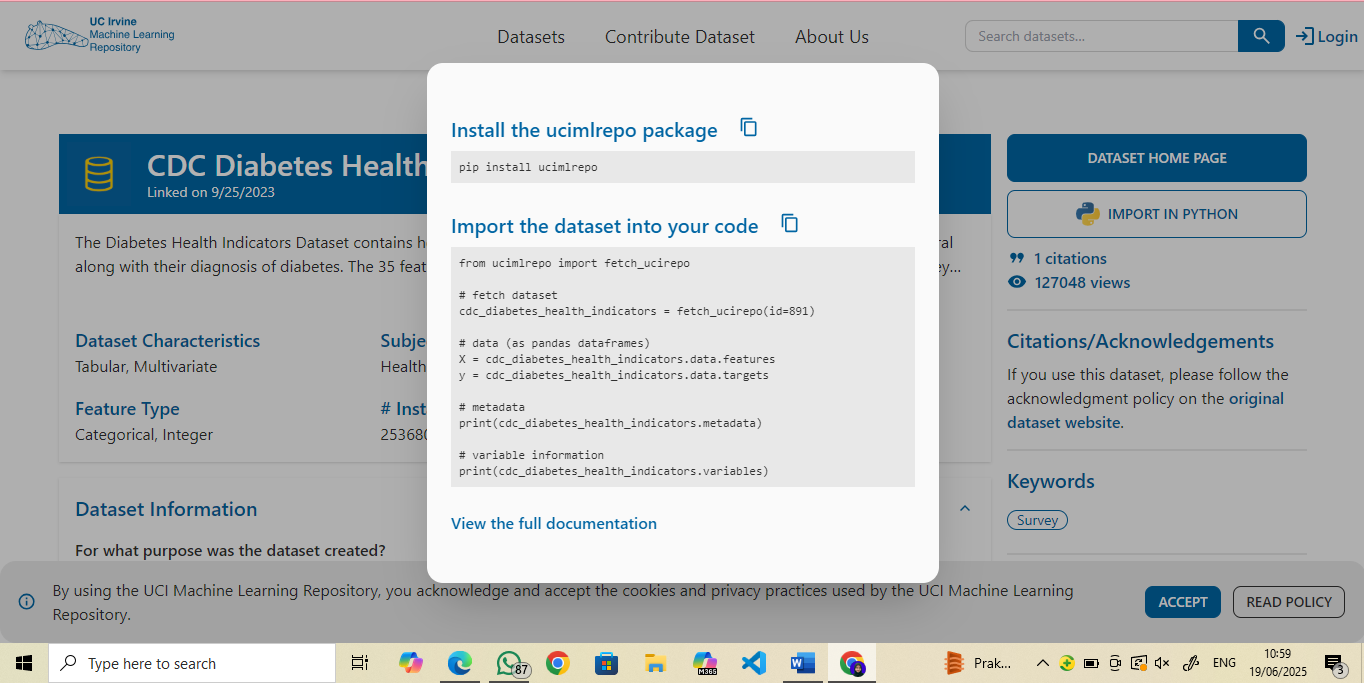

## **Visualisasi Data**

In [12]:
!pip install ucimlrepo

In [13]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [14]:
import pandas as pd

# Gabungkan fitur dan target
df_diabetes = pd.concat([X, y], axis=1)

# Tampilkan seluruh baris (jika datasetnya kecil)
# Jika besar, batasi baris atau ubah opsi tampilan
print("Total baris dataset ini adalah =",len(df_diabetes))
print("Visualisasi dataset diabetes")
print(df_diabetes.to_string(index=False))


Streaming output truncated to the last 5000 lines.
      1         0          1   24       0       0                     0             1       1        0                  0              1            0        3         0         0         0    1    8          6       8                0
      0         1          1   26       1       0                     0             1       1        1                  0              1            0        2         0         0         0    0   10          5       7                0
      0         1          1   26       0       0                     0             1       1        1                  0              1            0        1         0         0         0    1   11          6       8                0
      1         1          1   28       1       0                     1             0       1        1                  0              1            0        4         1         1         0    0   12          4       3                0
      0  

In [15]:
# Simpan ke file CSV
df_diabetes.to_csv('datasetdiabetes.csv', index=False)

## **Preprocessing Data**

### Transformasi Data

Kode ini memuat dataset dan mengubah nilai 0 dan 1 pada kolom Diabetes_binary menjadi label Non Diabetes dan Diabetes.


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load dataset
df = pd.read_csv('/content/datasetdiabetes.csv')

# 2. Ubah nilai pada kolom 'Diabetes_binary' menjadi kategorikal
df['Diabetes_binary'] = df['Diabetes_binary'].map({0: 'Non Diabetes', 1: 'Diabetes'})

## **Splitting Data**

Kode ini memisahkan fitur (`X`) dan target (`y`) dari dataset, dengan Diabetes_binary sebagai target klasifikasi.


In [17]:
# 3. Splitting fitur dan target
X = df.drop(columns='Diabetes_binary')
y = df['Diabetes_binary']

## **Visualisasi data setelah diubah ke kategorikal**

Kode ini menggabungkan kembali fitur dan target ke dalam satu DataFrame df_diabetescategorical, lalu menampilkan jumlah baris dan isi dataset dengan target yang sudah dikonversi menjadi kategorikal.


In [18]:
# 4. Gabungkan kembali agar seperti df_abalonecategorical
df_diabetescategorical = pd.concat([X, y], axis=1)

# 5. Tampilkan seluruh data dengan format seperti yang kamu contohkan
print("Total baris dataset ini adalah =", len(df_diabetescategorical))
print("Visualisasi dataset diabetes setelah target diubah menjadi kategorikal")
print(df_diabetescategorical)

Total baris dataset ini adalah = 253680
Visualisasi dataset diabetes setelah target diubah menjadi kategorikal
        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                          0             0       0        1  ...            0   
1     

In [19]:
# Simpan ke file CSV
df_diabetescategorical.to_csv('datasetdiabetescategorical.csv', index=False)

## **Modelling**

### Modelling klasifikasi dataset diabetes menggunakan decision tree

Pemodelan ini bertujuan untuk mengklasifikasikan status diabetes pada pasien berdasarkan sejumlah fitur seperti usia, jenis kelamin, dan gejala klinis seperti poliuria, polidipsia, serta penurunan berat badan mendadak. Kategori target terdiri dari dua kelas, yaitu: Non Diabetes dan Diabetes.

Model klasifikasi yang digunakan adalah Decision Tree Classifier, salah satu metode supervised learning yang berbasis aturan dan struktur pohon bercabang. Setiap percabangan merepresentasikan keputusan berdasarkan nilai fitur, dan setiap daun pohon menunjukkan hasil klasifikasi.

**1. Pembagian Dataset: Data Latih dan Data Uji**

  Langkah awal dalam pemodelan adalah membagi data menjadi dua bagian:

  - Data Latih (Training Set): digunakan untuk melatih model.

  - Data Uji (Testing Set): digunakan untuk mengevaluasi performa model terhadap data yang belum pernah dilihat sebelumnya.

  Dalam eksperimen ini digunakan rasio 80% data latih dan 20% data uji, yang merupakan praktik umum. Namun, pemilihan rasio dapat disesuaikan dengan karakteristik dataset.

**2. Pra-Pemrosesan Data**

  Sebelum data dimasukkan ke dalam model Decision Tree, dilakukan beberapa tahapan pra-pemrosesan untuk memastikan kualitas data:

- Konversi Target: Kolom class yang berisi nilai numerik 0 dan 1 diubah menjadi label kategori:

  - 0 → Non Diabetes

  - 1 → Diabetes

- Encoding Fitur Kategorikal: Fitur-fitur seperti Gender, Polyuria, dan Polydipsia dikodekan ke bentuk numerik agar dapat diproses oleh algoritma Decision Tree.

- Diskritisasi Tidak Diperlukan: Karena Decision Tree mampu menangani fitur numerik langsung, tidak dilakukan normalisasi atau diskritisasi terhadap fitur-fitur seperti Age.

**3. Pelatihan Model Decision Tree**

Model dilatih menggunakan algoritma Decision Tree, di mana:

- Setiap node pohon akan membagi data berdasarkan fitur yang memberikan informasi paling banyak dalam membedakan kelas, diukur dengan Gini Index (atau bisa juga menggunakan Entropy).

- Proses pemisahan dilakukan secara rekursif hingga mencapai kedalaman maksimum atau tidak ada lagi fitur yang bisa digunakan.

Dalam eksperimen ini digunakan konfigurasi:

- Kriteria: gini

- Kedalaman maksimum (max_depth): 5, untuk menghindari overfitting.

**4. Evaluasi Model**

Setelah pelatihan selesai, model dievaluasi menggunakan beberapa metrik evaluasi:

- Akurasi: Proporsi jumlah prediksi yang benar terhadap total data uji.

- Classification Report: Meliputi precision, recall, dan F1-score untuk masing-masing kelas (Diabetes dan Non Diabetes).

- Confusion Matrix: Menampilkan jumlah data yang diklasifikasikan dengan benar dan yang salah.

Selain evaluasi numerik, visualisasi pohon keputusan juga ditampilkan. Hal ini membantu untuk memahami bagaimana model mengambil keputusan — fitur mana yang dianggap paling penting, bagaimana urutan pengujiannya, dan bagaimana data diklasifikasikan pada tiap cabang.

**5. Prediksi Status Diabetes**

Setelah model dilatih dan dievaluasi, ia siap digunakan untuk:

- Memprediksi status diabetes pada data pasien baru berdasarkan kombinasi gejala dan informasi dasar pasien.

- Memberikan wawasan mengenai fitur mana yang paling menentukan dalam prediksi, seperti Polyuria, Sudden Weight Loss, atau Age.

**Kesimpulan**

Decision Tree adalah metode klasifikasi yang efektif dan mudah diinterpretasikan, cocok digunakan untuk klasifikasi data klinis seperti pada kasus deteksi diabetes. Keunggulannya antara lain:

- Mampu menangani data numerik dan kategorikal tanpa perlu normalisasi.

- Menghasilkan struktur pohon yang bisa divisualisasikan, sehingga mudah dipahami.

- Cepat dilatih, fleksibel, dan cocok untuk dataset berukuran kecil hingga menengah.

Model ini sangat berguna sebagai alat bantu diagnosis awal diabetes, memungkinkan tenaga medis atau sistem pendukung keputusan untuk melakukan prediksi secara cepat dan efisien — tanpa harus menunggu hasil laboratorium yang lebih kompleks.

Akurasi: 0.8661305581835383

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.59      0.10      0.17      6997
    Diabetes       0.87      0.99      0.93     43739

    accuracy                           0.87     50736
   macro avg       0.73      0.54      0.55     50736
weighted avg       0.83      0.87      0.82     50736



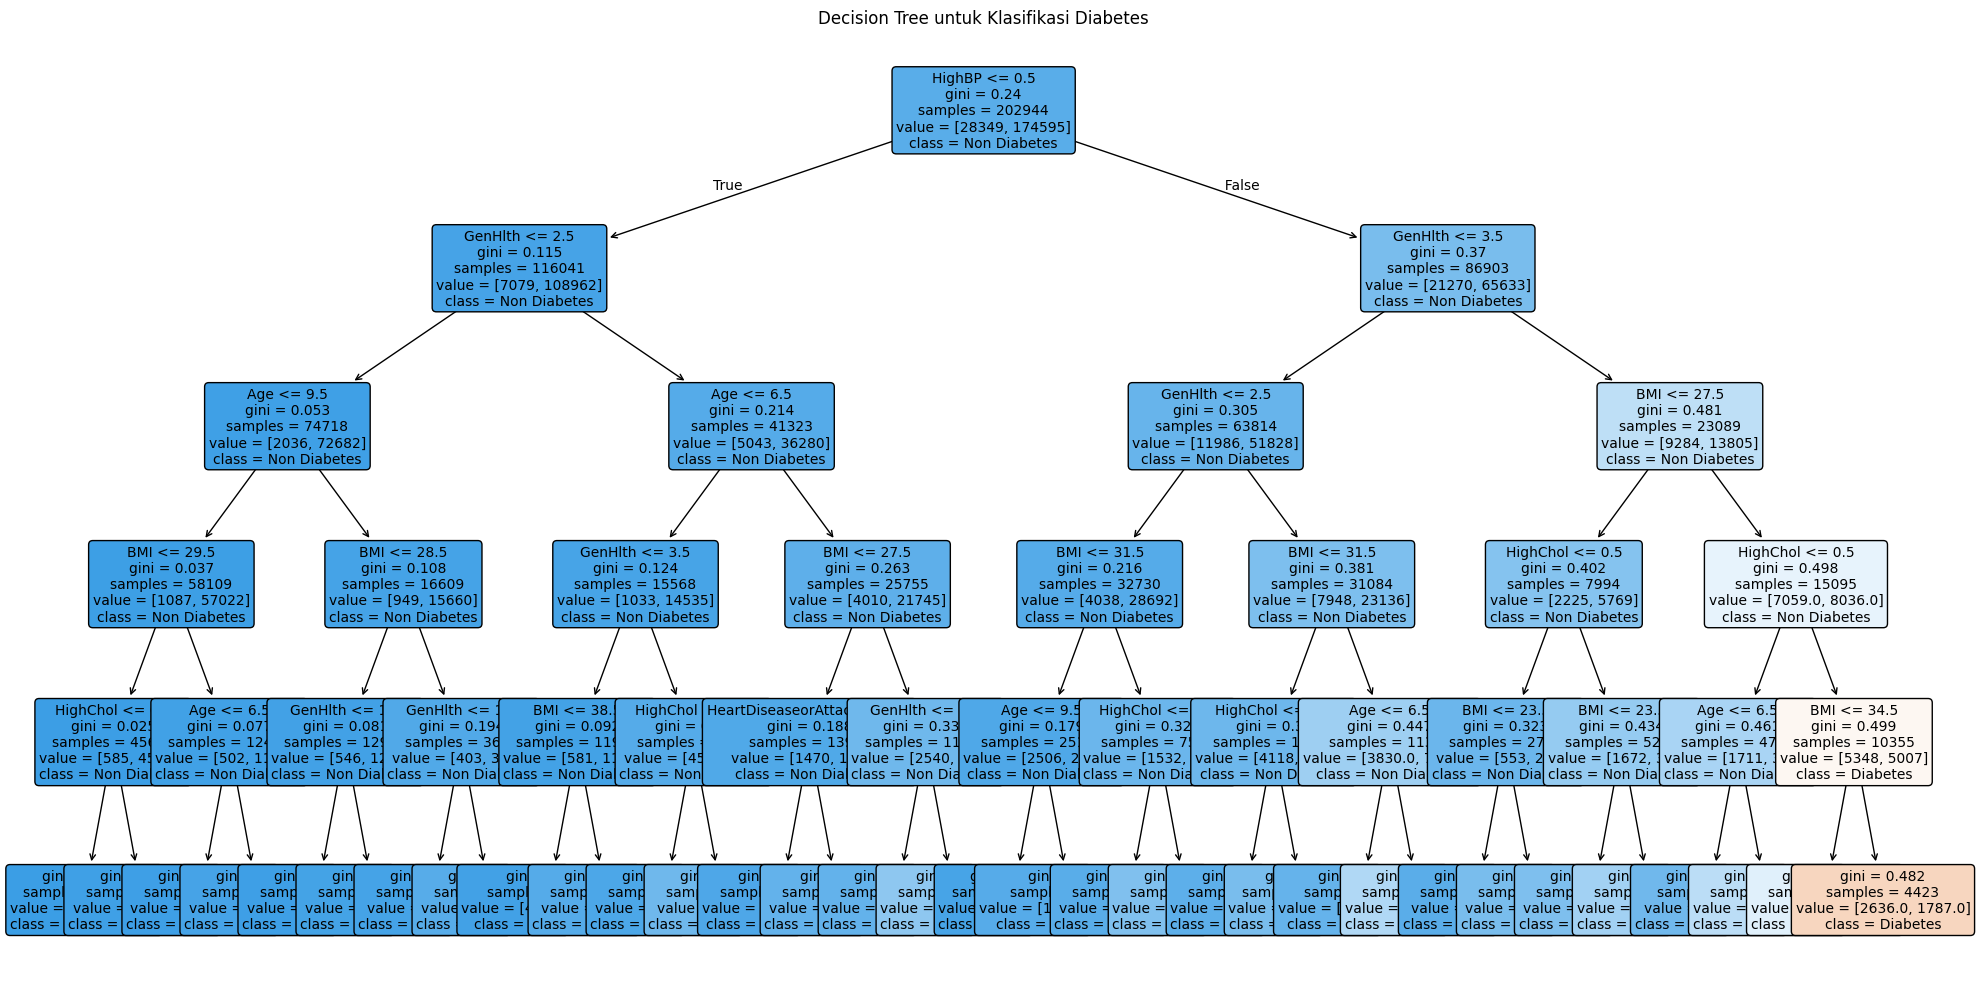

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 3. Split data training dan testing ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 4. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 5. Evaluasi Model ===
y_pred = clf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Non Diabetes", "Diabetes"]))

# === 6. Visualisasi Struktur Pohon ===
plt.figure(figsize=(20, 10))  # Ubah ukuran jika terlalu besar
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree untuk Klasifikasi Diabetes")
plt.tight_layout()
plt.show()


### Modelling klasifikasi dataset diabetes menggunakan KNN

Model K-Nearest Neighbors (KNN) digunakan dalam pemodelan ini untuk memprediksi status pasien apakah Diabetes atau Non Diabetes, berdasarkan fitur-fitur seperti usia, jenis kelamin, serta gejala klinis seperti poliuria, polidipsia, dan penurunan berat badan mendadak.

KNN merupakan metode instance-based learning, di mana prediksi terhadap data baru dilakukan dengan melihat “tetangga-tetangga” terdekatnya dalam ruang fitur — yaitu data latih dengan karakteristik paling mirip.

**1. Pembagian Dataset: Training dan Testing**

  Seperti pada metode supervised learning lainnya, dataset diabetes dibagi menjadi dua bagian:

  - Data Latih (Training Set): Digunakan sebagai basis referensi tetangga.

  - Data Uji (Testing Set): Digunakan untuk mengevaluasi performa model.

  Dalam pemodelan ini, digunakan 80% data latih dan 20% data uji, yang merupakan pembagian standar. Namun, rasio ini dapat disesuaikan tergantung pada ukuran dan distribusi dataset.

**2. Pra-Pemrosesan Data**

  Agar algoritma KNN bekerja optimal, dilakukan beberapa langkah pra-pemrosesan:

- Konversi Target: Kolom class yang berisi angka 0 dan 1 diubah menjadi label kategori:

  - 0 → Non Diabetes

  - 1 → Diabetes

- Encoding Fitur Kategorikal: Jika ada fitur kategorikal (seperti Gender, Polyuria, dll.), maka dilakukan encoding ke bentuk numerik. Ini dilakukan agar semua fitur bisa dihitung jaraknya secara numerik.

- Normalisasi (Scaling): Fitur-fitur numerik dinormalisasi menggunakan StandardScaler. Proses ini sangat penting karena KNN sensitif terhadap skala fitur. Tanpa normalisasi, fitur dengan rentang besar bisa mendominasi perhitungan jarak antar titik.

**3. Konsep Kerja KNN**

  Berbeda dengan model-model seperti Decision Tree yang membangun aturan eksplisit, KNN menyimpan seluruh data latih dan bekerja dengan prinsip kemiripan (jarak).

  Langkah-langkah klasifikasi:

  - Hitung jarak (misalnya Euclidean) antara data uji dan semua data latih.

  - Ambil k tetangga terdekat dari data latih.

  - Lakukan voting — kelas (Diabetes atau Non Diabetes) yang paling sering muncul di antara tetangga akan menjadi prediksi akhir.

  Misalnya, jika k = 5 dan dari 5 tetangga tersebut, 3 di antaranya merupakan pasien Diabetes, maka hasil prediksi untuk data tersebut adalah Diabetes.

**4. Evaluasi Model**

  Model KNN dievaluasi menggunakan metrik-metrik berikut:

  - Akurasi: Proporsi prediksi yang benar dibandingkan total data uji.

  - Classification Report: Meliputi precision, recall, dan F1-score untuk tiap kelas.

  - Confusion Matrix: Menampilkan jumlah prediksi benar dan salah untuk masing-masing kategori.

  Eksperimen terhadap nilai k (jumlah tetangga) juga dapat dilakukan (misalnya: k=3, k=5, k=7) untuk menemukan konfigurasi yang memberikan performa terbaik.

**Kesimpulan**

  Model K-Nearest Neighbors menunjukkan performa yang baik dalam mengklasifikasikan status diabetes berdasarkan gejala dan ciri pasien. Dengan asumsi data telah melalui proses encoding dan normalisasi yang tepat, KNN bisa menjadi solusi klasifikasi yang efektif dan mudah diimplementasikan, terutama ketika kecepatan dan interpretasi sederhana menjadi pertimbangan utama.

  Model ini membantu tenaga medis untuk mengidentifikasi potensi diabetes pada pasien tanpa perlu pemeriksaan yang lebih kompleks di awal, sehingga bisa digunakan sebagai sistem pendukung keputusan (decision support system) dalam tahap awal diagnosis.

Akurasi: 0.8467951750236519

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.40      0.21      0.27      6997
    Diabetes       0.88      0.95      0.91     43739

    accuracy                           0.85     50736
   macro avg       0.64      0.58      0.59     50736
weighted avg       0.82      0.85      0.83     50736



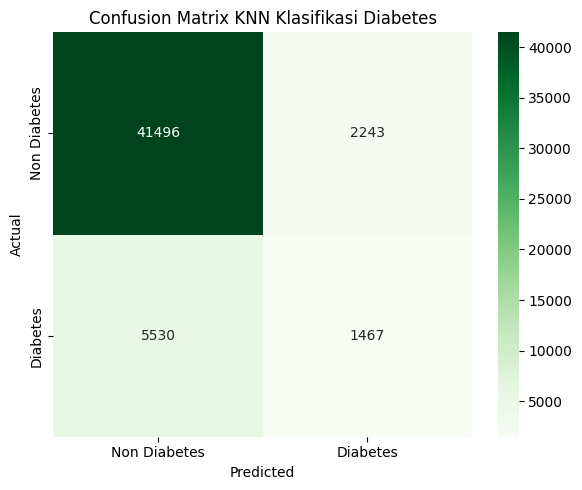

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# === 4. Normalisasi fitur (wajib untuk KNN) ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 5. Training model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# === 6. Prediksi dan Evaluasi ===
y_pred = knn.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Non Diabetes", "Diabetes"]))

# === 7. Visualisasi Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=["Non Diabetes", "Diabetes"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Non Diabetes", "Diabetes"],
            yticklabels=["Non Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Klasifikasi Diabetes")
plt.tight_layout()
plt.show()

### Modelling klasifikasi dataset diabetes menggunakan naive bayes

**1. Pembagian Dataset menjadi Data Latih dan Data Uji**

Langkah awal dalam proses modeling adalah membagi data menjadi dua bagian:

- Data Latih (Train Set): digunakan untuk membangun dan melatih model.

- Data Uji (Test Set): digunakan untuk menguji performa model terhadap data yang belum pernah dilihat sebelumnya.

Dua jenis rasio pembagian data yang umum digunakan:

- 80% data latih dan 20% data uji

- 70% data latih dan 30% data uji

Dalam modeling ini, digunakan rasio 80:20, namun rasio ini bersifat fleksibel dan dapat disesuaikan tergantung pada kebutuhan dan kondisi dataset.

**2. Menghitung Probabilitas Awal (Prior Probability)**

Setelah data dibagi, langkah pertama adalah menghitung probabilitas awal (prior) untuk masing-masing kelas target (Non Diabetes, Diabetes). Caranya:

- Hitung jumlah data latih yang termasuk ke dalam masing-masing kelas.

- Bagi jumlah tersebut dengan total data latih.

Nilai prior ini menunjukkan kemungkinan awal seorang pasien tergolong Diabetes atau Non Diabetes tanpa mempertimbangkan fitur apapun.

**3. Menghitung Rata-rata dan Standar Deviasi Setiap Fitur**

Untuk masing-masing kelas (Diabetes dan Non Diabetes), dihitung:

- Rata-rata (mean) setiap fitur numerik, seperti Age.

- tandar deviasi (standard deviation) dari setiap fitur numerik.

Langkah ini penting karena Gaussian Naive Bayes mengasumsikan bahwa distribusi data dalam setiap fitur mengikuti distribusi normal.

**4. Menghitung Distribusi Gaussian**

Menggunakan rumus distribusi Gaussian, probabilitas kemunculan nilai dari suatu fitur pada setiap kelas dihitung sebagai berikut:


$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Keterangan:

- $x$: nilai fitur input
- $\mu$: rata-rata fitur pada kelas tertentu
- $\sigma$: standar deviasi fitur pada kelas tertentu

**5. Menghitung Posterior Probability**

Setelah mendapatkan probabilitas Gaussian dari masing-masing fitur, langkah berikutnya adalah menghitung probabilitas posterior, yaitu:

$$
P(C_i|X) \propto P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

Keterangan:

- $P(x_k|C_i)$: hasil dari fungsi Gaussian fitur ke-$k$ pada kelas $C_i$
- $P(C_i)$: prior probability dari kelas $C_i$



**6. Menentukan Prediksi Kelas**

Setelah semua posterior probability dihitung untuk masing-masing kelas (Diabetes, Non Diabetes), model akan memilih kelas dengan nilai posterior tertinggi sebagai hasil prediksi akhir.

**Kesimpulan**

Model Gaussian Naive Bayes sangat cocok digunakan dalam klasifikasi status diabetes karena:

- Cepat dan efisien untuk data berukuran sedang.

- Tidak memerlukan banyak parameter dan bisa langsung diterapkan pada data numerik yang diasumsikan menyebar secara normal.

- Dapat digunakan meskipun ada fitur-fitur yang independen secara statistik satu sama lain.

Model ini membantu dalam deteksi awal diabetes, terutama jika diintegrasikan ke dalam sistem pendukung keputusan (Decision Support System), sehingga diagnosis bisa dilakukan lebih awal dan penanganan bisa lebih cepat.

Akurasi: 0.771996215704825

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.32      0.57      0.41      6997
    Diabetes       0.92      0.81      0.86     43739

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736



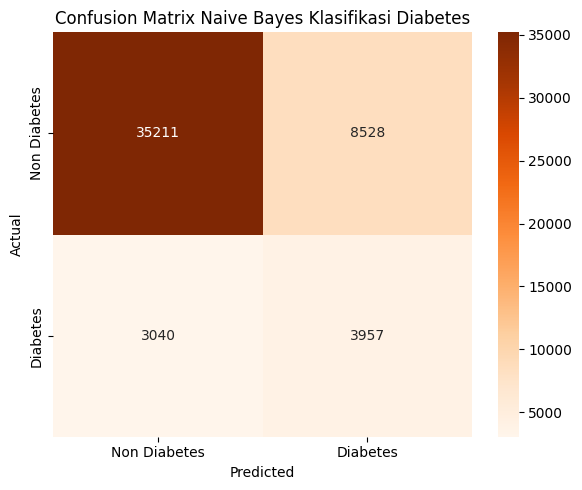

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 4. Training model Naive Bayes ===
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# === 5. Prediksi dan evaluasi ===
y_pred = model_nb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Non Diabetes", "Diabetes"]))

# === 6. Visualisasi Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=["Non Diabetes", "Diabetes"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Non Diabetes", "Diabetes"],
            yticklabels=["Non Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Naive Bayes Klasifikasi Diabetes")
plt.tight_layout()
plt.show()


## **Evaluasi Data**

Dari dataset diabetes diatas, akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

* Decision Tree = 86,61%
* K-Nearest Neighbor = 84,68%
* Gaussian Naive Bayes = 77,20%

Dari ketiga model diatas dapat disimpulkan bahwa Decision Tree memiliki akurasi tertinggi yaitu 86,61%.